#do the necessary installs

In [15]:
%pip install git+https://github.com/delbempedro/ic
%pip install pylatexenc
%pip install matplotlib
%pip install qiskit
%pip install qiskit_aer
%pip install qiskit_ibm_runtime

  Cloning https://github.com/delbempedro/ic to /tmp/pip-req-build-4i3tgtgu
  Running command git clone --filter=blob:none --quiet https://github.com/delbempedro/ic /tmp/pip-req-build-4i3tgtgu
  Resolved https://github.com/delbempedro/ic to commit 4daec1f9580938fbaf01d57eb3b6e9c87eb89305
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#do the necessary imports

In [16]:
from ic import *
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from matplotlib import pyplot as plt

to defines the quantum circuit with n qbits end m classical bits write
"
my_quantun_circuit = current_circuit(8,5)
"

to add a full adder circuit write
"
my_quantun_circuit.add_full_adder(1,1,0,0,carry_in=True)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit. The argument "carry_in = True" sets the carry in value to 1 (default = 0)

to add a simple adder circuit write
"
my_quantun_circuit.adds_simple_adder(1,1,0,0)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit

to draw the quantun circuit write
"
my_qc = my_quantun_circuit.get_current_circuit()
my_qc.draw(output='mpl',style='iqp')
"

In [17]:
#example
qc = current_circuit(22,13) #15,9 #22,14 #30,17
qc.add_full_adder(1,1,0,0,carry_in=True)
qc.add_full_adder(1,1,7,4)
qc.add_full_adder(1,1,14,8)
#qc.add_full_adder(1,1,22,12)

to create your token, you need to create a ibm account in
https://quantum.ibm.com/
and your token is "API Token" in the top right corner of the page

In [18]:
#save your ibm account
# save your token to your ibm_quantum account
print("Have you already saved your token? [Y/N]")
save_token = input()

if save_token == "N":
    print("Insert your token:")
    my_token = input()
    QiskitRuntimeService.save_account(
        overwrite=True,
        channel="ibm_quantum",
        token=my_token
    )

Have you already saved your token? [Y/N]


In [19]:
#configure your service
service = QiskitRuntimeService()

In [20]:
#define the type of run
print("Select your type of run by choosing a number:\n 1-Real Run \n 2-Simulation With Noise \n 3-Simulation Without Noise")
type_of_run = input()
print("You selected:",type_of_run)

Select your type of run by choosing a number:
 1-Real Run 
 2-Simulation With Noise 
 3-Simulation Without Noise
You selected: 1


In [21]:
#run your circuit and get the data
for i in range(9):
    data = qc.run_circuit(type_of_run,service)

In [11]:
#filter data
print("Insert your threshold to data filter")
threshold = int(input())
print("You insert",threshold)
filtered_data = {key: value for key, value in data.items() if value > threshold}

Insert your threshold to data filter
You insert 0


In [12]:
#set graph title and save name
print("Insert graph title:")# something like: "2 Full Adders (inputs: 1,1,1 and 1,1,0)"
title = input()
print(title)
print("Insert graph save name:")
save_name = "results/"+input()+".png"
print(save_name)

Insert graph title:
k
Insert graph save name:
results/m.png


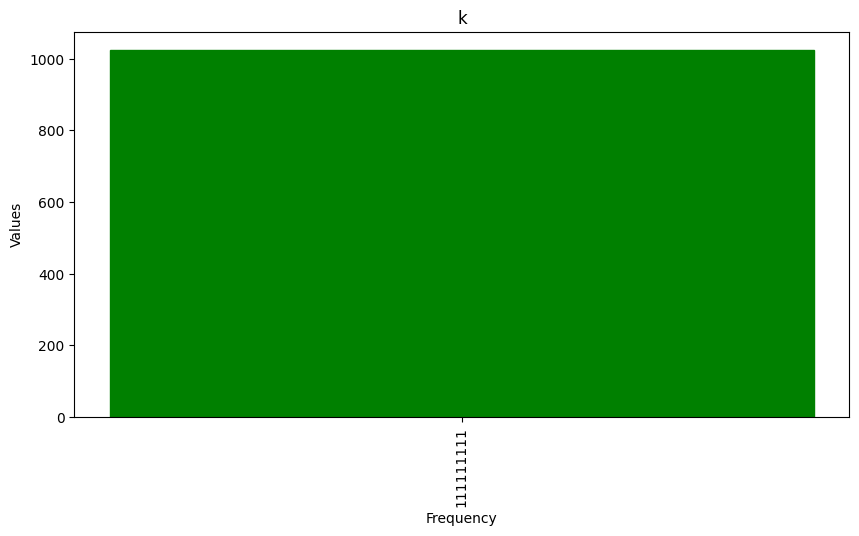

In [13]:
#plot your histogram with results and save image
names = list(filtered_data.keys())
values = list(filtered_data.values())

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(names, values, color='blue')

correct_value = names.index('1'*len(names[0]))
bars[correct_value].set_color('green')

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=90)
ax.set_title(title)
ax.set_xlabel('Frequency')
ax.set_ylabel('Values')

# Salvar a imagem do gráfico
plt.savefig(save_name, bbox_inches="tight")
plt.show()

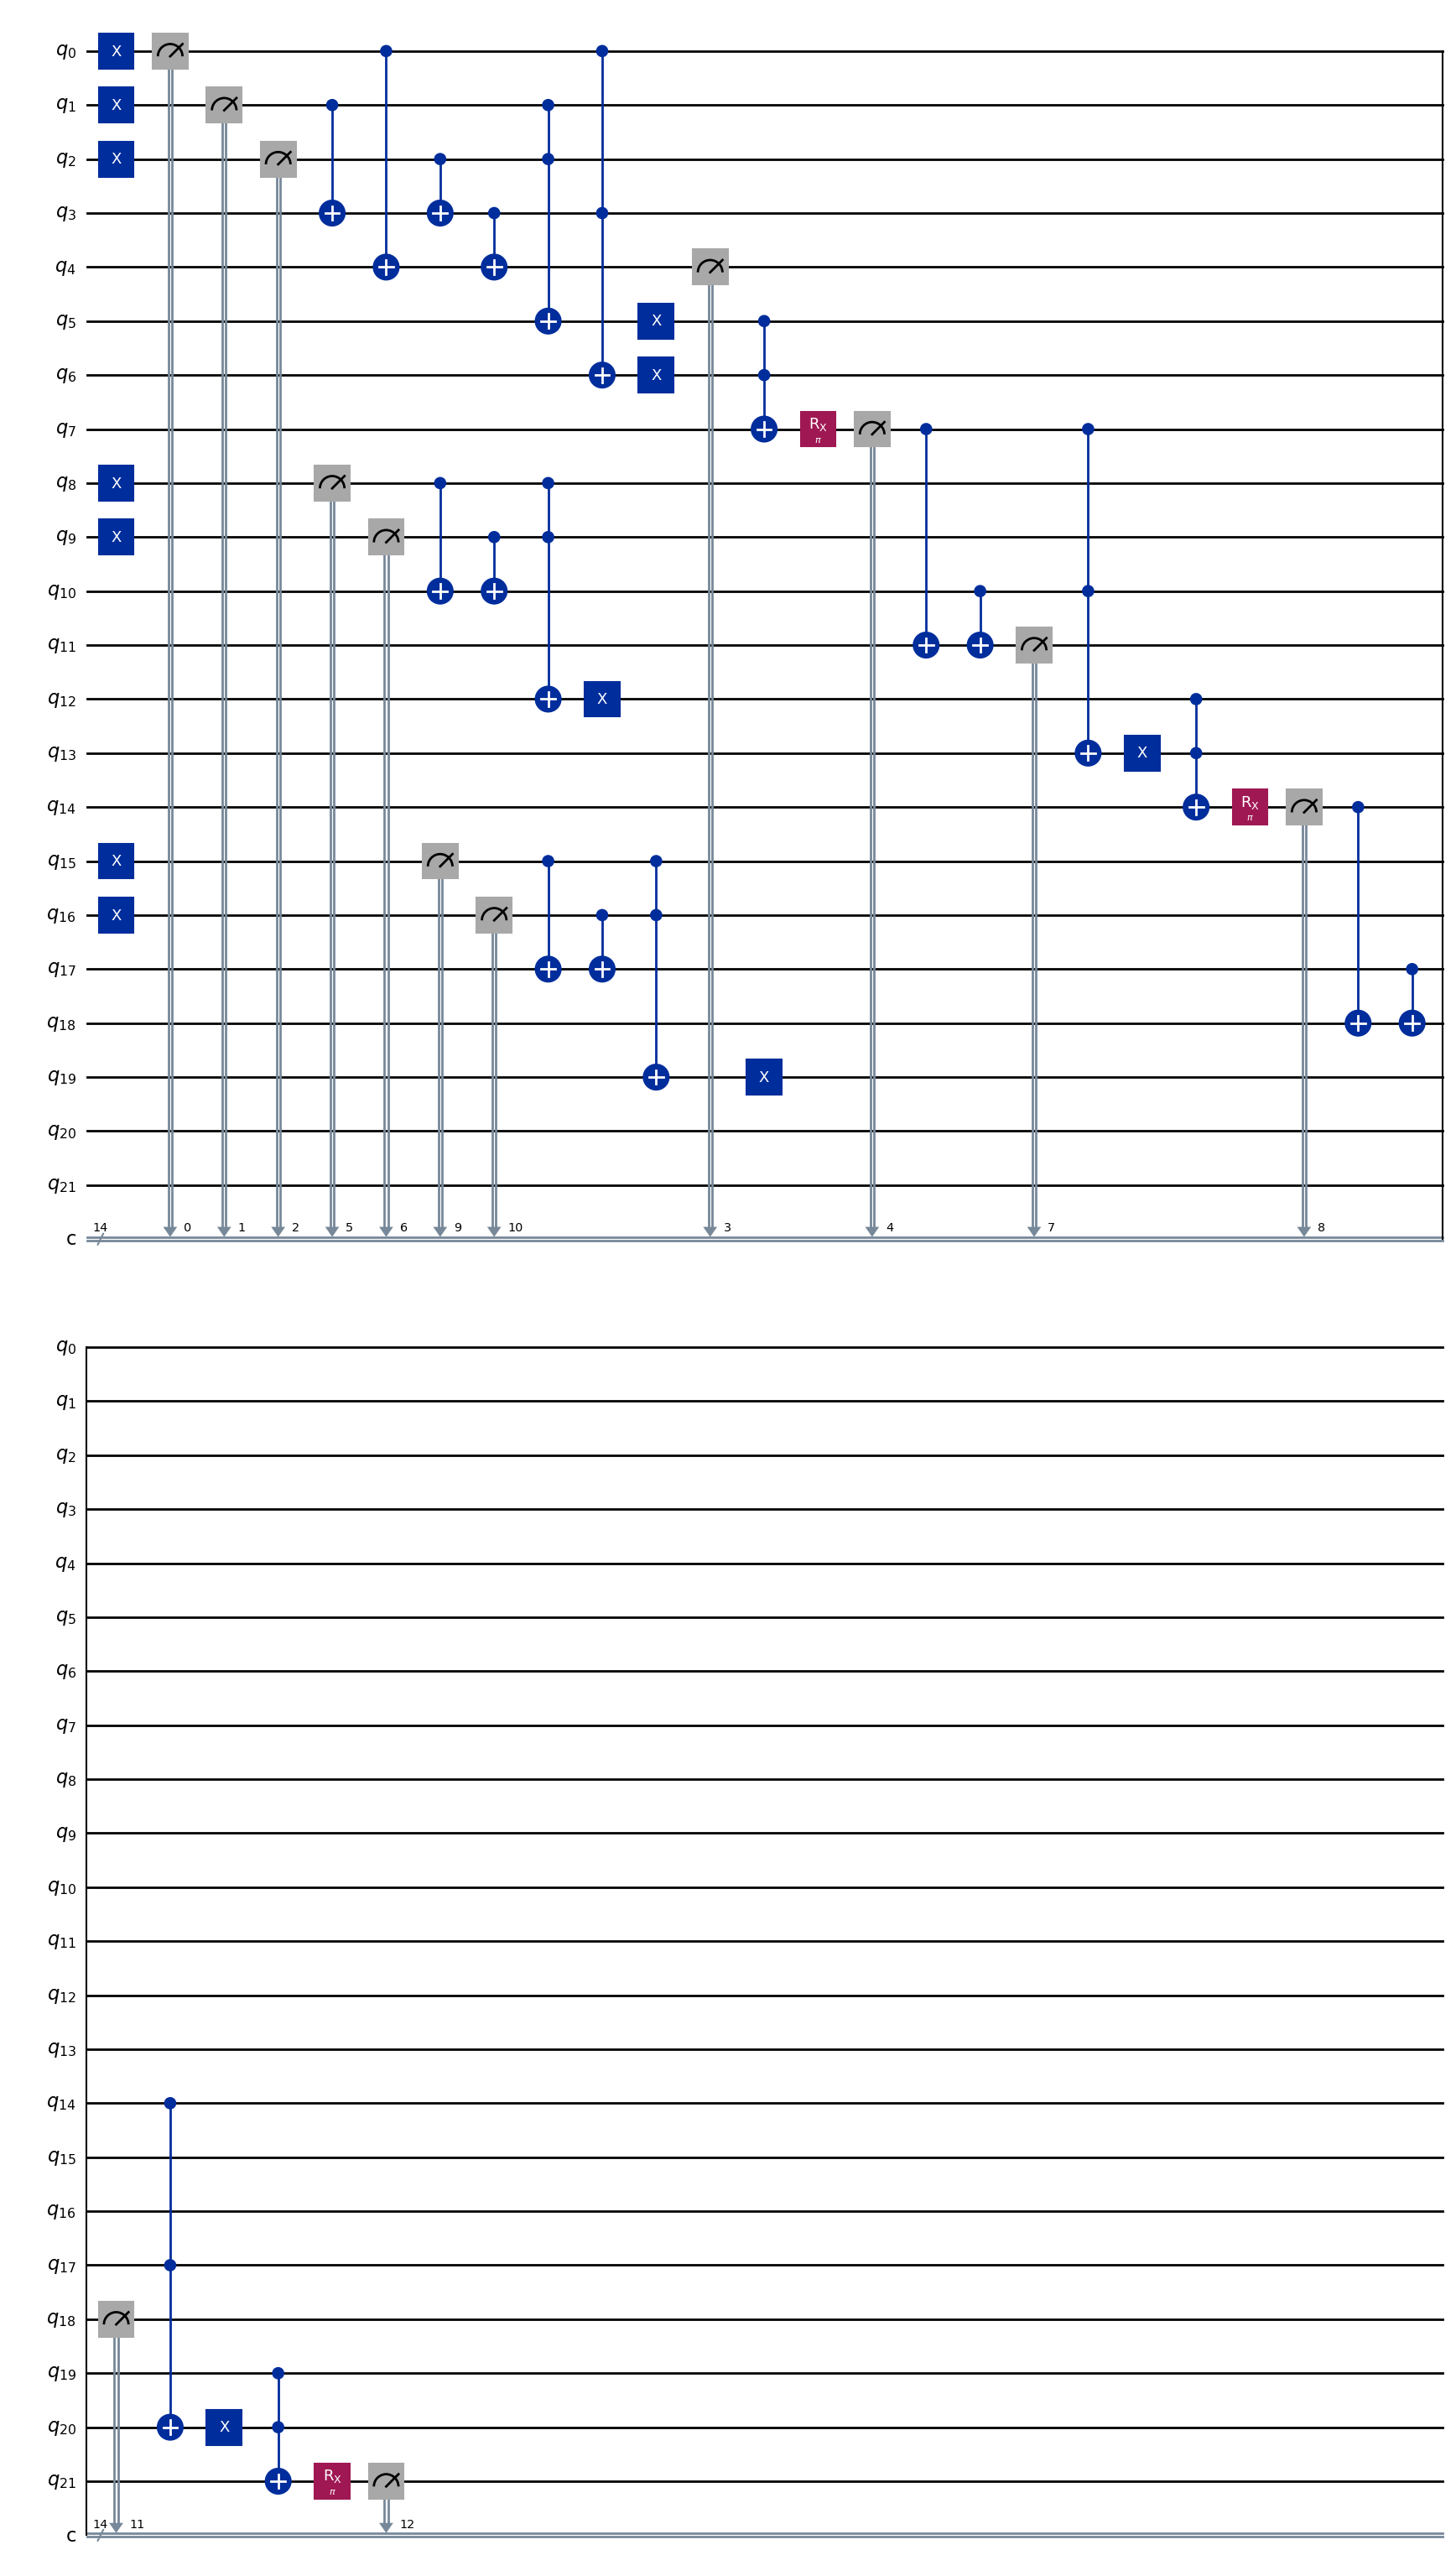

In [7]:
#visualize your circuit
qc.get_current_circuit().draw(output='mpl',style='iqp')